# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [4]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment Spectral Clustering on synthesis data

In [5]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

In [7]:
from scipy import stats
a = np.array([[2, 3, 2, 1],
              [1, 3, 2, 6],
              [1, 1, 3, 6]])
print(stats.mode(a))

ModeResult(mode=array([[1, 3, 2, 6]]), count=array([[2, 2, 2, 2]]))


In [206]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 15
threshold = 0.5
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph
#print(X)
W = knn_graph(X, k_in_knn_graph, threshold)
#a=W[np.where(W>0)]
print(W)

# implement spectral in spectral
from spectral import spectral

#idx = spectral(W, 2)
#cluster_plot(X, idx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [184]:
print(np.unique(W))
a=W[np.where(W>0)]
print(np.nanmax(a))
#print(W!=0)


[0.         0.50017416 0.50047497 ... 0.99948221 0.99968035 0.99971485]
0.9997148488343818


(4078, 10)


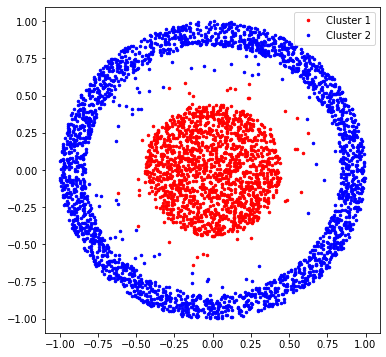

In [209]:
from spectral import spectral
idx = spectral(W, 2)
#print(idx)
cluster_plot(X, idx)

In [165]:
print(np.sum(idx==1))

3083


In [76]:
for i in range(W.shape[0]):
    for j in range(i+1,W.shape[0]):
        if W[i,j]!=W[j,i]:
            print('False')

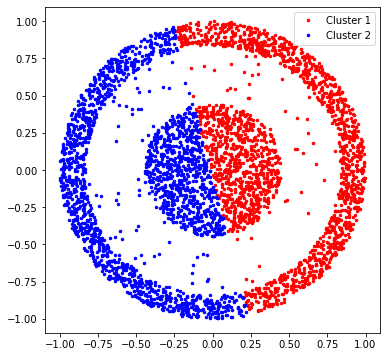

In [186]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [189]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [299]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
#print(len(fea),gnd.shape)
W = constructW(fea,NeighborMode='KNN',WeightMode='HeatKernel',k=5);

#W=constructW(fea)
W=W.toarray()
#print(np.mean(W))
#print(np.std(W))
W[np.where(W!=0)]=(W[np.where(W!=0)]-np.mean(W))/np.std(W)
#print(np.nanmax(W),np.nanmin(W))
#print(type(W),W.shape)
#print(W)
sum1=0
sum2=0
for i in range(10):
    idx = spectral(W, 5)

    idx2=bestMap(gnd,idx)
    sum1+=np.sum(idx2==gnd)/gnd.shape[0]
    mu=MutualInfo(gnd,idx2)
    sum2+=mu
print(sum1/10,sum2/10)
#print(np.unique(idx2))
#print(np.unique(idx))
#print(np.unique(gnd))


# end answer

0.7454131918119787 0.6152773912542459
